### Homework 6
+ Goal: Find outliers, trends and periodicity in the MTA turnstile data
+ DATA: MTA subway fares. It is a complete dataset of rides logged by card swipes for 600 Manhattan stations.

In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = np.load("MTA_Fare.npy")

In [3]:
df.shape

(600, 23, 194)

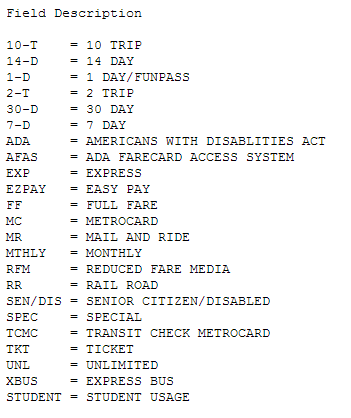

In [4]:
# see fields:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [5]:
# notes say weeks are 05/21/2010 to 02/21/2014, but numpy tells me that's 2 extra weeks than our data.
# cutting 2 weeks earlier to be only 1 day off week start day...
weeks = np.arange('2010-05-21', '2014-02-07', dtype='datetime64[W]')
print len(weeks)
print weeks[0], weeks[1], weeks[-1]

194
2010-05-20 2010-05-27 2014-01-30


In [6]:
# set array to float and replace -1 with nan
df = np.array(df, dtype=float)
df[df==-1] = np.nan

In [ ]:
# np.nanstd(np.nansum(df, 1), 0).shape # weekly standard deviation of total rides by station and week

In [7]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
len(ridetype)

23

# Task 1:
+ Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
+ Identify it and figure out what it is due to.

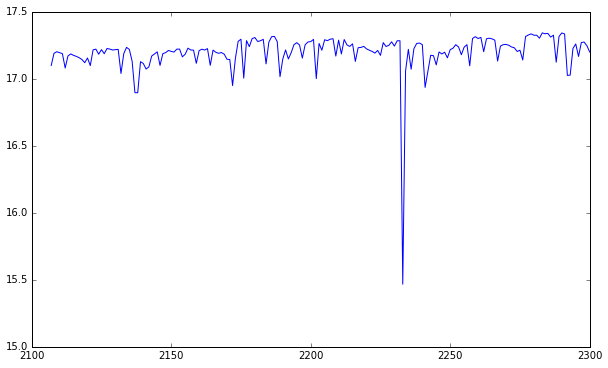

In [8]:
f = pl.figure(figsize(10, 6))
ax = f.add_subplot(111)
ax.plot(weeks, log(np.nansum(np.nansum(df, 1), 0))) # plot log of total rides regardless of type or station

In [9]:
# use visual above to select big drop
print weeks[log(np.nansum(np.nansum(df, 1), 0))<16]

['2012-10-18']


> MTA shuts many stations in prep for Hurricane Sandy: http://www.zerohedge.com/news/2012-10-28/advance-frankenstorm-sandy-nyc-suspending-all-transit-services-700-pm-sunday

> Alternate option: celebrations abound as NY court shuts down "defense against marriage" act, effectively legalizing same sex marriage http://www.cnn.com/2012/10/18/justice/new-york-appeals-court-doma/

# Task 2:
+ Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [10]:
tot_swipes_by_week = np.nansum(df, 0)
tot_swipes_by_week.shape

(23, 194)

In [11]:
avg_swipes_by_week = np.nanmean(df, 0)
avg_swipes_by_week.shape

/home/clayton/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


(23, 194)

In [12]:
print tot_swipes_by_week[:2, :2], avg_swipes_by_week[:2, :2]

[[ 11494615.  12526859.]
 [   530524.    583533.]] [[ 24880.11904762  27173.22993492]
 [  1148.32034632   1265.79826464]]


In [18]:
np.nanmean(avg_swipes_by_week[:,:10], 1).shape

(23,)

In [21]:
beg_end_means = np.zeros((23,2))
beg_end_means[:,0] = np.nanmean(avg_swipes_by_week[:,:10], 1)
beg_end_means[:,1] = np.nanmean(avg_swipes_by_week[:,-10:], 1)
#pl.plot(tot_swipes_by_week[0, :])
# beg_end_means

In [20]:
for i,v in enumerate(ridetype):
    print "%s changed rider ship by %.f" % (v, beg_end_means[i,0]-beg_end_means[i,1])

10t changed rider ship by -619
14d changed rider ship by -292
1d changed rider ship by -12
2t changed rider ship by 27
30d changed rider ship by -4
7d changed rider ship by -3329
ada changed rider ship by 1950
afas changed rider ship by 24
exp changed rider ship by 708
ez changed rider ship by 1295
ff changed rider ship by 16
mc changed rider ship by -61
mr changed rider ship by -311
month changed rider ship by 125
rfm changed rider ship by 637
rr changed rider ship by -223
sen changed rider ship by -129
spec changed rider ship by -68
tcmc changed rider ship by -140
t changed rider ship by -1
umlim changed rider ship by 3
xbus changed rider ship by -1
stud changed rider ship by nan


> Top three **increases** in popularity (as defined by simple average of first 10 weeks vs last 10 weeks where
> 1. ada (weekly average increased by 1950) - people with disabilities
> 2. ez (weekly average increased by 1295) - easy pay (that's me. but not for this time period)
> 3. exp (weekly average increased by 708) - express passes
>
> Top three **decreases** in popularity
> 1. 7d (weekly average decreased by 3329) - 7 day passes
> 2. 10t (weekly average decreased by 619) - 10 trip passes
> 3. mr (weekly average decreased by 311) - mail and ride

# Task 3:
+ Several stations show a prominent annual periodicity. 
+ Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [22]:
station_by_week = np.nansum(df, 1)
station_by_week.shape

(600, 194)

In [23]:
# Fourier transform
fourier_stations = np.fft.rfft(station_by_week)

In [24]:
fourier_stations.shape

(600, 98)

In [27]:
fourier_abs = np.abs(fourier_stations)
fourier_abs.shape

(600, 98)

In [29]:
# frequency
freqs = np.fft.rfftfreq(600, 1./52)
freqs.shape

(301,)

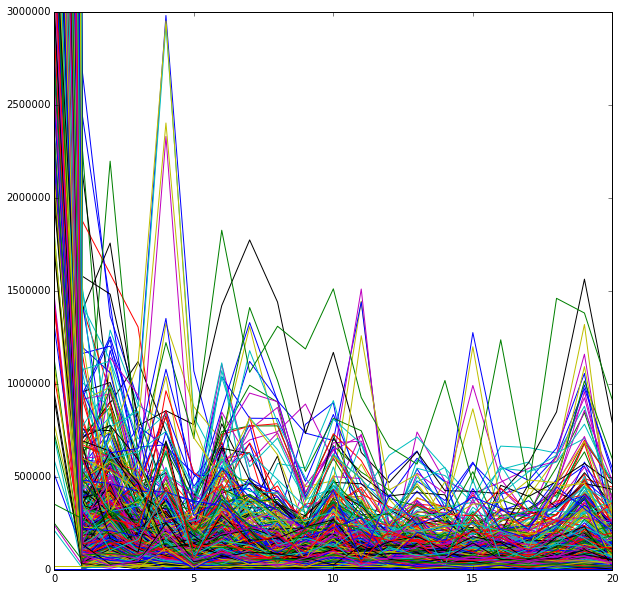

In [42]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, 3000000)
ax.set_xlim(0, 20)
for i in xrange(600):
    ax.plot(fourier_abs[i,:])

In [54]:
fourier_abs[fourier_abs[:,4]>2330000, 4]
np.where(fourier_abs[:,4]>2330000)

(array([  0, 150, 194, 327]),)

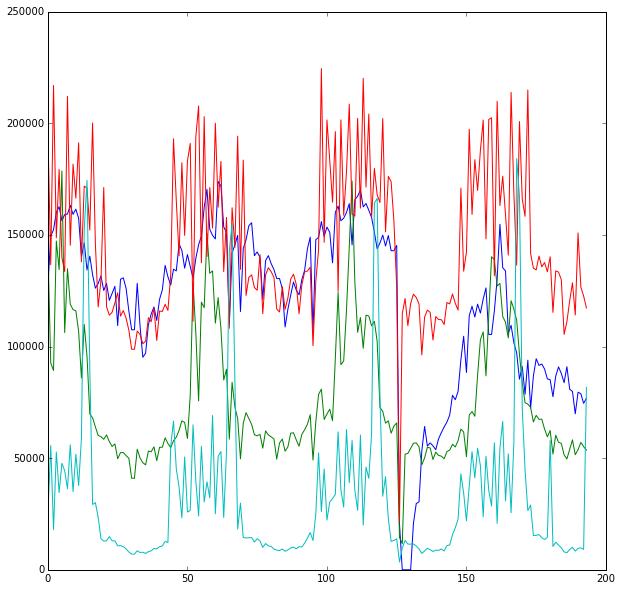

In [58]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in [ 0, 150, 194, 327]:
    ax.plot(station_by_week[i,:])

> stations exhibiting highest periodicity are in positions **0, 150, 194, and 327** along **axis 0** of the original MTA array, so their data can be accessed like "df[0,:,:]"

> guessing there is some annual event (or series of events given multi-week length of peaks?) but not sure what